## COMPARISON BETWEEN MULTI-COMPONENT GAUSSIAN AND ASYMMETRIC GAUSSIAN FITTING WITH SpELFiG

Execute until cell 18, that will produce material enough for the report

We locate ourselves in the directory in which the code and the spectra files are. The 2 next cell is a bash command (must not contain python syntax)

In [2]:
# Import libraries:

import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

# Import Spelfig packages:
import spl_fitters as spf
import sps_setupv2 as sps

import warnings
warnings.filterwarnings("ignore")

In [3]:
def open_manga_spectra(file):
    smooth_sigma = 0.4 # To smooth the data with a gaussian kernel.
    cube = fits.open(file)
    flyspec = cube[1].data
    hdu = cube[1].header
    redshift = hdu['Z']

    wave = (flyspec['wavelength']/(1+redshift))
    gas_flux = flyspec['flux_lines']
    err_flux = flyspec['flux_error']

    spec = np.array([wave, gas_flux, err_flux]).T
    # spec = gaussian_filter1d(spec, smooth_sigma, axis=0)

    return spec, redshift

# Function to properly extract the MAGPI spectra:
def open_magpi_ppxf(file):
    smooth_sigma = 0.4 # To smooth the data with a gaussian kernel.
    flyspec = fits.open(file)
    flyspec = flyspec[1].data

    wave = flyspec['wavelength']
    gas_flux = flyspec['lines flux']
    err_flux = flyspec['flux error']

    spec = np.array([wave, gas_flux, err_flux]).T
    # spec = gaussian_filter1d(spec, smooth_sigma, axis=0)

    return spec

In [4]:
emission_line_models1 = {
	'He-II,1': {'wavelength':[3202.15], 'components': ['Gaussian']},
	'He-II,2': {'wavelength':[4685.74], 'components': ['Gaussian']},
	'Ne-V,1':  {'wavelength':[3345.81], 'components': ['Gaussian']},
	'Ne-V,2':  {'wavelength':[3425.81], 'components': ['Gaussian']},
	'O-II,1':  {'wavelength':[3726.03], 'components': ['Gaussian']},
	'O-II,2':  {'wavelength':[3728.73], 'components': ['Gaussian']},
	'Ne-III,1': {'wavelength':[3868.69], 'components': ['Gaussian']},
	'Ne-III,2': {'wavelength':[3967.40], 'components': ['Gaussian']},
	'H-ζ':    {'wavelength':[3889.05], 'components': ['Gaussian']},
	'H-ε':    {'wavelength':[3970.07], 'components': ['Gaussian']},
	'H-δ':    {'wavelength':[4101.73], 'components': ['Gaussian']},
	'H-γ':    {'wavelength':[4340.46], 'components': ['Gaussian']},
	'O-III,0':  {'wavelength':[4363.15], 'components': ['Gaussian']},
	'O-III,1':  {'wavelength':[4958.83], 'components': ['Gaussian']},
	'O-III,2':  {'wavelength':[5006.77], 'components': ['Gaussian']},
	'Ar-IV,1':  {'wavelength':[4711.30], 'components': ['Gaussian']},
	'Ar-IV,2':  {'wavelength':[4740.10], 'components': ['Gaussian']},
	'H-β':     {'wavelength':[4861.32], 'components': ['Gaussian']},
	'N-I,1':    {'wavelength':[5197.90], 'components': ['Gaussian']},
	'N-I,2':    {'wavelength':[5200.39], 'components': ['Gaussian']},
	'He-I':   {'wavelength':[5875.60], 'components': ['Gaussian']},
	'O-I,1':   {'wavelength':[6300.20], 'components': ['Gaussian']},
	'O-I,2':   {'wavelength':[6363.67], 'components': ['Gaussian']},
	'N-II,1':   {'wavelength':[6547.96], 'components': ['Gaussian']},
	'N-II,2':   {'wavelength':[6583.34], 'components': ['Gaussian']},
	'H-α':     {'wavelength':[6562.80], 'components': ['Gaussian']},
	'S-II,1':  {'wavelength': [6716.31], 'components': ['Gaussian']},
	'S-II,2':   {'wavelength':[6730.68], 'components': ['Gaussian']},
	'Ar-III': {'wavelength':[7135.67], 'components': ['Gaussian']},
	}

emission_line_models2 = {
	'He-II,1': {'wavelength':[3202.15], 'components': ['Gaussian', 'Gaussian']},
	'He-II,2': {'wavelength':[4685.74], 'components': ['Gaussian', 'Gaussian']},
	'Ne-V,1':  {'wavelength':[3345.81], 'components': ['Gaussian']},
	'Ne-V,2':  {'wavelength':[3425.81], 'components': ['Gaussian']},
	'O-II,1':  {'wavelength':[3726.03], 'components': ['Gaussian']},
	'O-II,2':  {'wavelength':[3728.73], 'components': ['Gaussian']},
	'Ne-III,1': {'wavelength':[3868.69], 'components': ['Gaussian']},
	'Ne-III,2': {'wavelength':[3967.40], 'components': ['Gaussian']},
	'H-ζ':    {'wavelength':[3889.05], 'components': ['Gaussian', 'Gaussian']},
	'H-ε':    {'wavelength':[3970.07], 'components': ['Gaussian', 'Gaussian']},
	'H-δ':    {'wavelength':[4101.73], 'components': ['Gaussian', 'Gaussian']},
	'H-γ':    {'wavelength':[4340.46], 'components': ['Gaussian', 'Gaussian']},
	'O-III,0':  {'wavelength':[4363.15], 'components': ['Gaussian']},
	'O-III,1':  {'wavelength':[4958.83], 'components': ['Gaussian', 'Gaussian']},
	'O-III,2':  {'wavelength':[5006.77], 'components': ['Gaussian', 'Gaussian']},
	'Ar-IV,1':  {'wavelength':[4711.30], 'components': ['Gaussian']},
	'Ar-IV,2':  {'wavelength':[4740.10], 'components': ['Gaussian']},
	'H-β':     {'wavelength':[4861.32], 'components': ['Gaussian', 'Gaussian']},
	'N-I,1':    {'wavelength':[5197.90], 'components': ['Gaussian']},
	'N-I,2':    {'wavelength':[5200.39], 'components': ['Gaussian']},
	'He-I':   {'wavelength':[5875.60], 'components': ['Gaussian']},
	'O-I,1':   {'wavelength':[6300.20], 'components': ['Gaussian']},
	'O-I,2':   {'wavelength':[6363.67], 'components': ['Gaussian']},
	'N-II,1':   {'wavelength':[6547.96], 'components': ['Gaussian']},
	'N-II,2':   {'wavelength':[6583.34], 'components': ['Gaussian']},
	'H-α':     {'wavelength':[6562.80], 'components': ['Gaussian', 'Gaussian']},
	'S-II,1':  {'wavelength': [6716.31], 'components': ['Gaussian', 'Gaussian']},
	'S-II,2':   {'wavelength':[6730.68], 'components': ['Gaussian', 'Gaussian']},
	'Ar-III': {'wavelength':[7135.67], 'components': ['Gaussian']},
	}

emission_line_models3 = {
	'He-II,1': {'wavelength':[3202.15], 'components': ['Asymmetric Gaussian']},
	'He-II,2': {'wavelength':[4685.74], 'components': ['Asymmetric Gaussian']},
	'Ne-V,1':  {'wavelength':[3345.81], 'components': ['Gaussian']},
	'Ne-V,2':  {'wavelength':[3425.81], 'components': ['Gaussian']},
	'O-II,1':  {'wavelength':[3726.03], 'components': ['Gaussian']},
	'O-II,2':  {'wavelength':[3728.73], 'components': ['Gaussian']},
	'Ne-III,1': {'wavelength':[3868.69], 'components': ['Gaussian']},
	'Ne-III,2': {'wavelength':[3967.40], 'components': ['Gaussian']},
	'H-ζ':    {'wavelength':[3889.05], 'components': ['Asymmetric Gaussian']},
	'H-ε':    {'wavelength':[3970.07], 'components': ['Asymmetric Gaussian']},
	'H-δ':    {'wavelength':[4101.73], 'components': ['Asymmetric Gaussian']},
	'H-γ':    {'wavelength':[4340.46], 'components': ['Asymmetric Gaussian']},
	'O-III,0':  {'wavelength':[4363.15], 'components': ['Gaussian']},
	'O-III,1':  {'wavelength':[4958.83], 'components': ['Asymmetric Gaussian']},
	'O-III,2':  {'wavelength':[5006.77], 'components': ['Asymmetric Gaussian']},
	'Ar-IV,1':  {'wavelength':[4711.30], 'components': ['Gaussian']},
	'Ar-IV,2':  {'wavelength':[4740.10], 'components': ['Gaussian']},
	'H-β':     {'wavelength':[4861.32], 'components': ['Asymmetric Gaussian']},
	'N-I,1':    {'wavelength':[5197.90], 'components': ['Gaussian']},
	'N-I,2':    {'wavelength':[5200.39], 'components': ['Gaussian']},
	'He-I':   {'wavelength':[5875.60], 'components': ['Gaussian']},
	'O-I,1':   {'wavelength':[6300.20], 'components': ['Gaussian']},
	'O-I,2':   {'wavelength':[6363.67], 'components': ['Gaussian']},
	'N-II,1':   {'wavelength':[6547.96], 'components': ['Gaussian']},
	'N-II,2':   {'wavelength':[6583.34], 'components': ['Gaussian']},
	'H-α':     {'wavelength':[6562.80], 'components': ['Asymmetric Gaussian']},
	'S-II,1':  {'wavelength': [6716.31], 'components': ['Asymmetric Gaussian']},
	'S-II,2':   {'wavelength':[6730.68], 'components': ['Asymmetric Gaussian']},
	'Ar-III': {'wavelength':[7135.67], 'components': ['Gaussian']},
	}


In [5]:
import os
import re
from astropy.io import fits
import random

pattern = r'(manga-\d+-\d+)'

maindir = os.getcwd()
inputdir = maindir + '/poster/'
spectra = {}

def random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
IDS = []
for file in os.listdir(inputdir):
  if file.endswith(".fits"):
    id = re.search(pattern, file).group(1)
    IDS.append(id)
    print('Opening file: ', file)
    spec, redshift = open_manga_spectra(inputdir+file)
    spectra[id] = {'data': spec, 'redshift': redshift}


Opening file:  manga-8137-3702-1.0Reff-DAP.fits
Opening file:  manga-8318-6102-1.0Reff-DAP.fits
Opening file:  manga-8612-12704-1.0Reff-DAP.fits
Opening file:  manga-12074-3701-1.0Reff-DAP.fits
Opening file:  manga-9026-9101-1.0Reff-DAP.fits
Opening file:  manga-11013-6101-1.0Reff-DAP.fits


Create the first estimations

In [6]:
## FITTING THE EMISSION LINES:
## WARNING: THIS CELL IS THE HEAVIEST

## Spectral index for the continuum:
gamma0 = -0.01
specrange = (4800, 6800)
## Observed data stored in variables:


def list_fitter(specdict, specrange, gamma0):
    for key, item in specdict.items():
        gal = key
        spec0 = item['data']
        try:
            df0_1 = sps.init_setup(spec0, emission_line_models1, specrange, gamma0)
            df0_2 = sps.init_setup(spec0, emission_line_models2, specrange, gamma0)
            df0_3 = sps.init_setup(spec0, emission_line_models3, specrange, gamma0)
            fit1 = spf.mcmc_fit(df0_1, spec0[:, 0], spec0[:, 1], spec0[:, 0], niter=5000)
            fit2 = spf.mcmc_fit(df0_2, spec0[:, 0], spec0[:, 1], spec0[:, 0], niter=5000)
            fit3 = spf.mcmc_fit(df0_3, spec0[:, 0], spec0[:, 1], spec0[:, 0], niter=5000)
            item['single gaussian fit'] = fit1
            item['double gaussian fit'] = fit2
            item['asymmetric gaussian fit'] = fit3
    
        except Exception as e:
            print("The following error occurred during setup. Skipping...")
            print(e)
            item['single gaussian fit'] = None
            item['double gaussian fit'] = None
            item['assymetric gaussian fit'] = None
            
    return specdict

spectra = list_fitter(spectra, specrange, gamma0)

100%|██████████| 5000/5000 [00:41<00:00, 120.07it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:03<00:00, 1525.56it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [01:01<00:00, 81.17it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 3490.29it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 2630.09it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 3128.76it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:47<00:00, 105.16it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:03<00:00, 1510.33it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [01:02<00:00, 79.75it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 3305.60it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:02<00:00, 1842.78it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 2904.82it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 3445.33it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:03<00:00, 1616.99it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 3020.20it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 3352.26it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:02<00:00, 1838.79it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


100%|██████████| 5000/5000 [00:01<00:00, 3163.69it/s]


This list of lines groups ['O-III,1' 'O-III,2' 'H-β' 'N-I,1' 'N-I,2' 'He-I' 'O-I,1' 'O-I,2' 'N-II,1'
 'N-II,2' 'H-α' 'S-II,1' 'S-II,2' 'Continuum']
Successful! Convergence found.


In [7]:
IDS

['manga-8137-3702',
 'manga-8318-6102',
 'manga-8612-12704',
 'manga-12074-3701',
 'manga-9026-9101',
 'manga-11013-6101']

,Line Name,Model,Component,Parameters,Parameter Errors
0,"O-III,1",Asymmetric Gaussian,1,"[4959.767769786398, 90.63294055564998, 0.29891...","[0.0009570312966616379, 0.0009819605578779008,..."
1,"O-III,2",Asymmetric Gaussian,1,"[5007.967008010164, 263.04719402187425, 0.2997...","[0.0009391631383626878, 0.0009253711871778898,..."
2,H-β,Asymmetric Gaussian,1,"[4862.519684563314, 43.03436748385478, 0.30119...","[0.0009409015932084173, 0.0010209298694355494,..."
3,"N-I,1",Gaussian,1,"[5200.693268837698, 4.656724562580641, 2.66816...","[0.0009484403871727222, 0.0010273090525095116,..."
4,"N-I,2",Gaussian,1,"[5200.693099124793, 4.656460579490442, 2.66877...","[0.0008542842555294437, 0.0010284835872073621,..."
5,He-I,Gaussian,1,"[5877.075435344844, 4.848296292631873, 2.48252...","[0.00101832663277415, 0.0009837158544738743, 0..."
6,"O-I,1",Gaussian,1,"[6301.751640225999, 20.904020230660194, 2.5964...","[0.0009474580906433372, 0.0009599388977622867,..."
7,"O-I,2",Gaussian,1,"[6365.923115790027, 6.606918983755774, 2.62750...","[0.0010837127643163061, 0.0010100369850724062,..."
8,"N-II,1",Gaussian,1,"[6550.302144215499, 29.25936366881269, 2.64823...","[0.0010322324163712885, 0.0010885738857053053,..."
9,"N-II,2",Gaussian,1,"[6585.084543297657, 86.64295304298219, 2.96818...","[0.0009114396371221985, 0.0009616627620850608,..."


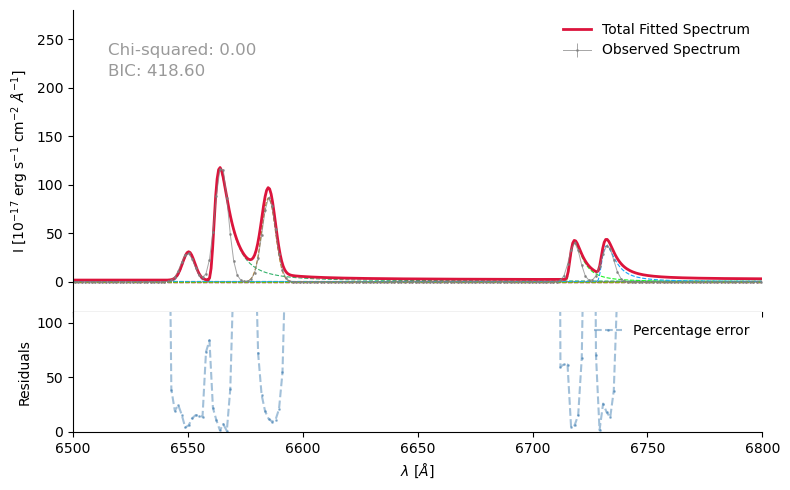

In [8]:
# REVIEW AN SPECIFIC GALAXY FIT FROM THE SAMPLE:
# Here review a specific galaxy from the sample:

gal = spectra['manga-11013-6101']


data = gal['data']
single_gaussian = gal['single gaussian fit']
double_gaussian = gal['double gaussian fit']
asymm_gaussian = gal['asymmetric gaussian fit']

x, y, dy = data[:, 0], data[:, 1], data[:, 2]

# HERE MODIFY WHICH ONE TO VISUALIZE: &&&&&&&&&&&&&&&&&&
fit_to_visualize = asymm_gaussian
xzoom = (6500, 6800)
yzoom = None

dfparams = fit_to_visualize.model_parameters_df
goodness = fit_to_visualize.goodness

sps.spl_plot(x, y, dy, dfparams, x_zoom=xzoom, y_zoom=yzoom, goodness_marks=goodness)

dfparams

In [9]:
# Selection of the best gaussian fit:
# For this cell, what we want to do is to select the best gaussian fit between one and two 
# components. Then we will use THAT fit to compare with the asymmetric gaussian one.

# Lets first store the goodness in a table:

def goodness_table(specdict):
    ID = []
    chi1gauss, chi2gauss, chiasymgauss = [], [], []
    BIC1gausass, BIC2gaussass, BICasymgauss = [], [], []
    for key, item in specdict.items():
        ID.append(key)
        good_1gauss = item['single gaussian fit'].goodness
        good_2gauss = item['double gaussian fit'].goodness
        good_asymgauss = item['asymmetric gaussian fit'].goodness
        chi1gauss.append(good_1gauss['reduced chi squared'])
        chi2gauss.append(good_2gauss['reduced chi squared'])
        chiasymgauss.append(good_asymgauss['reduced chi squared'])
        BIC1gausass.append(good_1gauss['BIC'])
        BIC2gaussass.append(good_2gauss['BIC'])
        BICasymgauss.append(good_asymgauss['BIC'])
        
    table = pd.DataFrame(list(zip(ID, chi1gauss, chi2gauss, chiasymgauss, BIC1gausass, BIC2gaussass, BICasymgauss)),
                         columns=['ID', 'chi1gauss', 'chi2gauss', 'chiasymgauss', 'BIC1gausass', 'BIC2gaussass', 'BICasymgauss'])
    return table
        

tab_goodness = goodness_table(spectra)

In [10]:
tab_goodness

,ID,chi1gauss,chi2gauss,chiasymgauss,BIC1gausass,BIC2gaussass,BICasymgauss
0,manga-8137-3702,1.783305e-07,1.790535e-07,1.788505e-07,355.703382,507.359470,406.258262
1,manga-8318-6102,3.330798e-07,3.339079e-07,1.349416e-06,357.284877,508.929462,418.189386
2,manga-8612-12704,2.793800e-04,2.804996e-04,2.791103e-04,3209.066794,3349.390889,3249.298060
3,manga-12074-3701,1.036780e-07,1.040961e-07,1.735897e-07,354.940455,506.599513,406.204641
4,manga-9026-9101,8.312082e-05,8.347805e-05,9.124028e-05,1179.202951,1327.737610,1310.371191
5,manga-11013-6101,8.498224e-07,8.531849e-07,1.389303e-06,362.565841,514.194154,418.595932


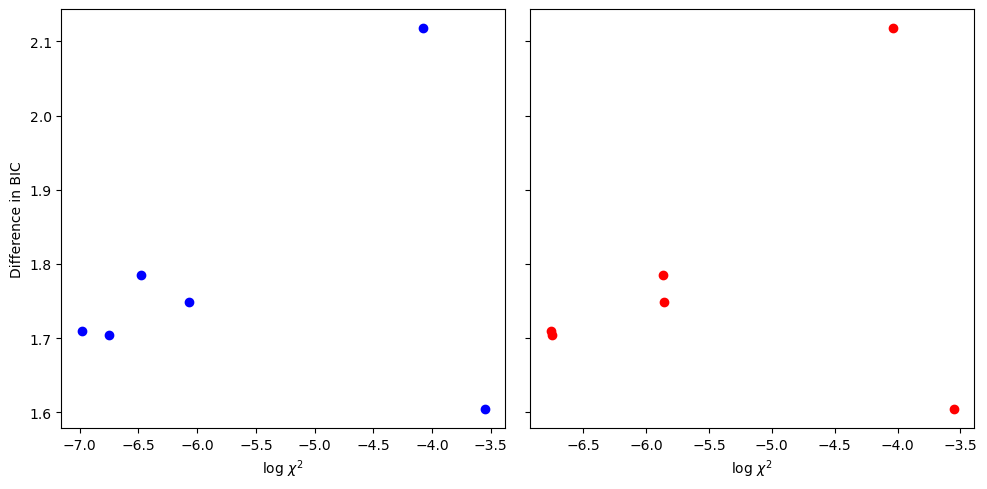

In [11]:
# Lets plot the goodness parameter space:

def plot_goodness(table, comparison='double gaussian fit'):
    x1 = np.log10(table['chi1gauss'])
    if comparison == 'double gaussian fit':
        dif_bic = np.log10(table['BIC2gaussass'] - table['BIC1gausass'])
        x2 = np.log10(table['chi2gauss'])
    elif comparison == 'asymmetric gaussian fit':
        dif_bic = np.log10(table['BICasymgauss'] - table['BIC1gausass'])
        x2 = np.log10(table['chiasymgauss'])
        
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

    # First subplot
    ax1.scatter(x1, dif_bic, color='blue', marker='o')
    ax1.set_xlabel(r'log $\chi^2$')
    ax1.set_ylabel('Difference in BIC')
    #ax1.set_yscale('log')
    #ax1.set_xscale('log')

    ax2.scatter(x2, dif_bic, color='red', marker='o')
    ax2.set_xlabel(r'log $\chi^2$')
    #ax2.set_yscale('log')
    #ax2.set_xscale('log')

    # Display the plot
    plt.tight_layout()
    plt.show()


plot_goodness(tab_goodness, comparison='asymmetric gaussian fit')

In [12]:
# We have to discuss further the selection of the best gaussian fit. Chi squared and BIC are 
# essentially not a good way to compare in this small sample. By now I am just picking the 2 
# component fits so we can compare multi-component against asymmetric gaussian.

for id, gal in spectra.items():
    gal['best gaussian fit'] = gal['double gaussian fit']

In [13]:
# VELOCITY TRANSFORMATIONS AND FLUX FRACTION VELOCITY CALCULATION ºººººººººººººººººººººººººººº
# EQUIVALENT WIDTH AND VELOCITY PROPERTIES CALCULATION
# A AND K PARAMETER CALCULATION

import spl_models as spm
from scipy.integrate import quad, simps
from scipy.optimize import fsolve

# Value for velocity of light:
c = 299792.458  # Speed of light in km/s (vacuum)


def vel_correct(l0, l):
    '''
    Transform wavelength to units of velocity (km/s) given a reference wavelength l0 (in case of a single gaussian-fitted-line analysis, it is the centroid).
    '''
    vel = c*((l-l0)/l0)
    return vel

def vel_correct_sigma(sigma, l0):
    '''
    Transform sigma (D(lambda)) to velocity units
    '''
    vel = c*(sigma/l0)
    return vel


def mean_loc(dfline):
    '''
    Calculate the mean centroid of multicomponent emission line
    '''
    LOC, A, SD = [], [], []
    for index, row in dfline.iterrows():
        line_params = row['Parameters']
        model = row['Model']
        LOC.append(line_params[0])
        A.append(line_params[1])
        if model == 'Assymetric Gaussian':
            SD.append(line_params[3])
        else:
            SD.append(line_params[2])
            
    LOC = np.array(LOC)
    A = np.array(A)
    SD = np.array(SD)
    
    loc_c = np.sum(LOC*A*SD)/np.sum(A*SD)
    return loc_c

def line_function(x, dfline):
    '''
    Gives the analytical form for the profile of a given line, giving as input the line 
    sub-dataframe 
    '''
    def gline(x, dfline):
        result = 0
        for index, row in dfline.iterrows():
            line_params = row['Parameters']
            model = row['Model']
            if model == 'Gaussian':
                result += spm.gauss(x, *line_params)
            elif model == 'Lorentzian':
                result += spm.lorentzian(x, *line_params)
            elif model == 'Voigt':
                result += spm.voigt(x, *line_params)
            elif model == 'Asymmetric Gaussian':
                result += spm.asym_gauss(x, *line_params)
        return result
    return gline


def intflux(x, dfline, xmin):
    
    '''
    Calculate the integrated flux of a given line
    :param x: the upper limit for the integral calculation. The lower limit is -np.inf
    :param dfline: the sub-dataframe containing the parameters of the line. This is individually 
    per line since the slicing of the dataframe per each line already occurs in the methods that 
    use this function
    :return: The calculated area under the emission profile which corresponds to the flux of the 
    line (what we usually call flux is actually observed intensity, not flux)
    '''
    gline = line_function(x, dfline)
    flux, error = quad(gline, xmin, x, args=dfline)
    return flux


def V_flux(dfline, r, LOC, xmax, xmin):
    '''
    Function to solve for flux fraction velocity of a given fitted line.
    The radial velocity corresponds to the line-of-sight component of the velocity
    # vector of the object. In this case, it is represented by the median velocity of the line, i. e.; the value that bisects the total integrated flux of the line.
    '''
    def eq_int_vel(x):
        F = intflux(xmax, dfline, xmin)
        return intflux(x, dfline, xmin) - r*F

    sol = fsolve(eq_int_vel, LOC)
    vel_rad = vel_correct(LOC, sol)

    return vel_rad


def calculate_line_properties(df, specrange):

    xmin = specrange[0]
    xmax = specrange[1]
    
    results = []
    param_start = 0
    x_mock = np.linspace(specrange[0], specrange[1], 10000)
    lines = df['Line Name'].unique()
    linelist = list(lines)
    
    for i, line in enumerate(linelist):
        
        dfline = df[df['Line Name'] == line]
        # print('Adequate line function CHECK ... (prior intflux)')
        # print('Here line', line)
        line_profile = np.zeros_like(x_mock)
        for index, row in dfline.iterrows():
            line_params = row['Parameters']
            Ncomp = row['Component']
            model = row['Model']
            
            
            if model == 'Gaussian':
                line_profile += spm.gauss(x_mock, *line_params)
            elif model == 'Lorentzian':
                line_profile += spm.lorentzian(x_mock, *line_params)
            elif model == 'Voigt':
                line_profile += spm.voigt(x_mock, *line_params)
            elif model == 'Asymmetric Gaussian':
                line_profile += spm.asym_gauss(x_mock, *line_params)
                
        flux = intflux(xmax, dfline, xmin)
        max_amplitude = np.max(line_profile)
        #print('This max amplitude', max_amplitude)
        #print('This flux', flux)
        half_max = max_amplitude / 2.0
        indexes = np.where(line_profile >= half_max)[0]
        fwhm = x_mock[indexes[-1]] - x_mock[indexes[0]]
        #print('This fwhm', fwhm)
        # Calculate Equivalent Width (EW)
        # EW = Flux / (peak amplitude)
        ew = flux / max_amplitude
        # Calculate the mean centroid:
        loc_c = mean_loc(dfline)
        #print('This loc c', loc_c)
        
        # Calculate radial velocity, W80, W90, A, and K:
        v_r = V_flux(dfline, 0.5, loc_c, xmax, xmin)[0] # radial velocity
        v_90 = V_flux(dfline, 0.9, loc_c, xmax, xmin)[0]
        v_10 = V_flux(dfline, 0.1, loc_c, xmax, xmin)[0]
        v_95 = V_flux(dfline, 0.95, loc_c, xmax, xmin)[0]
        v_05 = V_flux(dfline, 0.05, loc_c, xmax, xmin)[0]
        
        # Velocity widths:
        W80, W90 = v_90 - v_10, v_95 - v_05
        A = ((v_90 - v_r) - (v_r - v_10)) / W80
        K = W90 / (1.397 * fwhm)
        
        results.append({
            'Line Name': line,
            'Mean Loc': loc_c,
            'Flux': flux,
            'FWHM (Angstrom)': fwhm,
            'Equivalent Width (Angstrom)': ew,
            'V_med (km/s)': v_r,
            'W80 (km/s)': W80,
            'A': A,
            'K': K
        })
        
    # Convert the list of dictionaries into a Pandas DataFrame
    properties_df = pd.DataFrame(results)
    
    return properties_df

In [14]:
# Some methods to produce the necessary tables for the final data analysis:

def properties_perline_sample(superdict, line, fittabkey, proptabkey):
    # Identifiers:
    ID, Z = [], []
    # Derived properties:
    loc_c, flux, fwhm, ew, v_r, W80, A, K = [], [], [], [], [], [], [], []
    
    # Fit parameters:
    sigmas, gammas, asym, w_width = [], [], [], []
    
    for key, item in superdict.items():
        fit_tab = item[fittabkey].model_parameters_df
        prop_tab = item[proptabkey]
        
        ID.append(key)
        Z.append(item['redshift'])
        
        # First extract the properties:
        prop_tab = prop_tab[prop_tab['Line Name'] == line]

        
         # Append the scalar value of the properties:
        flux.append(prop_tab['Flux'].values[0] if not prop_tab.empty else np.nan)
        loc_c.append(prop_tab['Mean Loc'].values[0] if not prop_tab.empty else np.nan)
        fwhm.append(prop_tab['FWHM (Angstrom)'].values[0] if not prop_tab.empty else np.nan)
        ew.append(prop_tab['Equivalent Width (Angstrom)'].values[0] if not prop_tab.empty else np.nan)
        v_r.append(prop_tab['V_med (km/s)'].values[0] if not prop_tab.empty else np.nan)
        W80.append(prop_tab['W80 (km/s)'].values[0] if not prop_tab.empty else np.nan)
        A.append(prop_tab['A'].values[0] if not prop_tab.empty else np.nan)
        K.append(prop_tab['K'].values[0] if not prop_tab.empty else np.nan)
        
        # Then extract parameters from the fit:
        fit_tab = fit_tab[fit_tab['Line Name'] == line]
        sigmas_i, gammas_i, asym_i, w_width_i = [], [], [], []
        
        for index, row in fit_tab.iterrows():
            if row['Model'] == 'Gaussian':
                sigmas_i.append(row['Parameters'][2])
            elif row['Model'] == 'Lorentzian':
                gammas_i.append(row['Parameters'][2])
            elif row['Model'] == 'Asymmetric Gaussian':
                asym_i.append(row['Parameters'][2])
                w_width_i.append(row['Parameters'][3])
            elif row['Model'] == 'Voigt':
                sigmas_i.append(row['Parameters'][2])
                gammas_i.append(row['Parameters'][3])
        
        # Handle condition for non-empty lists correctly:
        gammas.append(np.max(gammas_i) if len(gammas_i) > 0 else np.nan)
        sigmas.append(np.max(sigmas_i) if len(sigmas_i) > 0 else np.nan)
        w_width.append(np.max(w_width_i) if len(w_width_i) > 0 else np.nan)
        asym.append(np.max(asym_i) if len(asym_i) > 0 else np.nan)
    
            
    # After the loop over all galaxies store the table:
    linetab = pd.DataFrame({
        'ID': ID,
        'redshift': Z,
        'Flux': flux,
        'Mean Loc': loc_c,
        'FWHM (Angstrom)': fwhm,
        'Equivalent Width (Angstrom)': ew,
        'V_med (km/s)': v_r,
        'W80 (km/s)': W80,
        'A': A,
        'K': K,
        'Max Sigma': sigmas,
        'Max Gamma': gammas,
        'a_Asymmetry': asym,
        'W_width': w_width
    })
    
    return linetab
    

def sample_line_properties(spectradict, specrange):
    for id, gal in spectradict.items():
        print(id)
        df1 = gal['best gaussian fit'].model_parameters_df
        df2 = gal['asymmetric gaussian fit'].model_parameters_df
        gal['lines properties gaussian'] = calculate_line_properties(df1, specrange)
        gal['lines properties asymmetric gaussian'] = calculate_line_properties(df2, specrange)
        
    return spectradict


In [15]:
# Lets compute the line properties for both types of fit:
spectra = sample_line_properties(spectra, specrange)

manga-8137-3702
manga-8318-6102
manga-8612-12704
manga-12074-3701
manga-9026-9101
manga-11013-6101


In [16]:

# Lets extract the properties for Ha and OIII from the different for your report.

# OIII line, gaussian fit
OIIIp_gauss = properties_perline_sample(spectra, 'O-III,2', 'best gaussian fit', 
                                        'lines properties gaussian')
# H alpha line, gaussian fit
Hap_gauss = properties_perline_sample(spectra, 'H-α', 'best gaussian fit', 'lines properties gaussian')

# OIII line, asymmetric gaussian fit
OIIIp_asymmetric = properties_perline_sample(spectra, 'O-III,2', 'asymmetric gaussian fit', 
                                             'lines properties asymmetric gaussian')

# H alpha line, asymmetric gaussian fit
Hap_asymmetric = properties_perline_sample(spectra, 'H-α', 'asymmetric gaussian fit', 
                                           'lines properties asymmetric gaussian')


In [21]:
# Lets add the luminosities to both tables:
from astropy.cosmology import WMAP9 as cosmo

def luminosity_distance(Z):
    '''
    Returns the Luminosity distance given a redshift.
    '''
    DL = cosmo.luminosity_distance(Z)
    #DL = np.array([DL[i].value for i in range(len(Z))])
    DL = DL*3.086e+24 #Mpc to cm
    return DL

def Luminosity(Flux, DL):
    '''
    Returns the Luminosity given the flux and the luminosity distance
    '''
    Lux = (4*np.pi*(DL**2)*Flux*1e-17)
    return Lux

# Adding the luminosities to all tables here:

# Luminosity distance calculation:
OIIIp_gauss['Distance (cm)'] = luminosity_distance(OIIIp_gauss['redshift'])
Hap_gauss['Distance (cm)'] = luminosity_distance(Hap_gauss['redshift'])
OIIIp_asymmetric['Distance (cm)'] = luminosity_distance(OIIIp_asymmetric['redshift'])
Hap_asymmetric['Distance (cm)'] = luminosity_distance(Hap_asymmetric['redshift'])


# Luminosity:
OIIIp_gauss['Luminosity'] = Luminosity(OIIIp_gauss['Flux'], OIIIp_gauss['Distance (cm)'])
Hap_gauss['Luminosity'] = Luminosity(Hap_gauss['Flux'], Hap_gauss['Distance (cm)'])
OIIIp_asymmetric['Luminosity'] = Luminosity(OIIIp_asymmetric['Flux'], 
                                            OIIIp_asymmetric['Distance (cm)'])
Hap_asymmetric['Luminosity'] = Luminosity(Hap_asymmetric['Flux'], Hap_asymmetric['Distance (cm)'])

In [24]:
# Review any of the tables here:

OIIIp_gauss
#Hap_gauss
#OIIIp_asymmetric
#Hap_asymmetric

,ID,redshift,Flux,Mean Loc,FWHM (Angstrom),Equivalent Width (Angstrom),V_med (km/s),W80 (km/s),A,K,Max Sigma,Max Gamma,a_Asymmetry,W_width,Distance (cm),Luminosity
0,manga-8137-3702,0.066881,559.583294,5007.072675,6.00060,6.510894,-4.909126e-05,398.535372,4.046135e-07,61.019289,2.599270,NaN,NaN,NaN,9.384166e+26,6.192499e+40
1,manga-8318-6102,0.046550,1508.886837,5008.870762,4.40044,4.835099,2.716591e-05,295.812911,-3.016538e-07,61.761216,1.929211,NaN,NaN,NaN,6.436186e+26,7.854593e+40
2,manga-8612-12704,0.126069,2095.561632,5008.816336,8.40084,8.953435,2.284132e-07,547.962808,-1.369236e-09,59.927082,3.571914,NaN,NaN,NaN,1.841977e+27,8.934678e+41
3,manga-12074-3701,0.118928,709.850143,5009.541047,11.00110,11.854669,-1.796834e-06,725.314413,8.137184e-09,60.573819,4.728995,NaN,NaN,NaN,1.729479e+27,2.668131e+41
4,manga-9026-9101,0.033985,18981.234961,5005.938695,8.60086,9.367820,-1.305798e-06,573.515981,7.478661e-09,61.263021,3.736541,NaN,NaN,NaN,4.655394e+26,5.169484e+41
5,manga-11013-6101,0.034043,1450.214664,5007.965662,5.00050,5.514819,3.070600e-06,337.466178,-2.988752e-08,62.002840,2.199556,NaN,NaN,NaN,4.663495e+26,3.963376e+40


#### AKSITA: FINAL NOTES FOR THE PROJECT:

The tables produced from the previous cells provides everything needed to finalize the analysis for 
your report. The remaining task is to create the following plots, based on the information from 
the four tables above. Follow these steps for both $[OIII]$ and $H\alpha$ lines (4 meta-tables 
produced in the previous cell):

1. Plot the asymmetry parameter ($a_{sym}$) from the asymmetric Gaussian fit (under the 
'a_Asymmetry' key) against the velocity asymmetry parameter (under the 'A' key), calculated from the velocities. Discuss the scatter pattern and its implications.

2. Compare the kurtosis (K) parameter from both the asymmetric Gaussian fit and the normal Gaussian
 fit. Plot K from both models against each other and explore any correlations or deviations.

3. Plot the Luminosity versus:
    - Gaussian sigma
    - Asymmetric Gaussian width parameter (w)
    - If Lorentzian fits are included, also plot the gamma parameter. Use different color codes and symbols for subgroups in the same plot to distinguish between them.

4. Create a separate plot of Luminosity versus:
    - FWHM (Full Width at Half Maximum)
    - $W_{80}$ (width containing 80% of the line flux)
    Do this for both the Gaussian and asymmetric Gaussian fits, using different symbols for each model.

5. Velocity offset plots:
    Knowing that you have the velocity offset computing code for the lines, you can use this information
    to produce:
    - Plot velocity offset versus $a_{sym}$.
    - Plot velocity offset versus redshift. This can be done as two separate plots or combined into one
    plot with a color gradient (use a colourbar) representing the redshift.


These plots will allow us to compare the outflow detection differences between the fitting models.
 Analyzing and discussing these comparisons will complete your report ! :)


In [ ]:

'''
Let's have a look at an individual fit of one of the emission lines, assuming it's Gaussian:
Taking a Gaussian with the form  a * np.exp(-0.5*((x - b / c)**2))
'''

# Define the emission line
Emission_line = 'N-II,1'
params = fit0[fit0['Line Name'] == Emission_line]

# Generate x-axis values
x = spec0[:, 0]
gauss_comp = []

for index, row in params.iterrows():

  # Define the Gaussian
  b, a, c  = row["Parameters"] # Extract parameters from the row
  # Calculate Gaussian & Append
  gauss = a * np.exp(-(x-b)**2/(2*c**2))
  gauss_comp.append(gauss)

gauss_total = np.sum(gauss_comp, axis=0)

# Normalise spectra (optional, depending on data)
# spec0_norm = spec0[:, 1] / np.max(spec0[:, 1])

# Zoom into the plot
lowerlim = b - 100
upperlim = b + 100

# Plot the Gaussian distribution and normalised spectra
plt.plot(x, spec0[:, 1], label='spectra')
plt.plot(x, gauss_total, label=Emission_line + ' fit', ls='dashed')
plt.xlim(lowerlim, upperlim)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.show()

## Next step: elevating the number of components for a given list of lines.
This should be a good goal to hit for the next week. Let´s dive into it and discuss any progress on Friday. We have to:
* Create a function that takes as inputs:
 * A given dataframe with same structure as the input and output one from the run_mcmc_chains method.
 * A list of a subgroup of lines with components to ADD the current model (see cell below)
 * Based on that: take the parameters from the previous component(s) as guesses for the next ones, update correctly the dataframe, and run the run_mcmc_chains method again.



---

*Refinements*

 Add extra method that identifies when adding more components whether the centroid is blue or red shifted compared to the previous profile (calculate which side the mean residuals are shifted towards) and update further guesses

####A function to update components without recalculating minimum and maximum limits:



In [ ]:
def update_components(dfparams, dfog, additional_components_dict, num):
    '''
    This function takes a dataframe of a given emission line spectral model and
    updates it with additional components, in consistency with the lines specified
    in the additional_components_dict.

    dfparams: output of earlier mcmc runs
    dfog: original dataframe of spectra
    additional_components_dict: a dictionary of the components to be added
    num: number of iterations to run the mcmc chains
    '''

    # Create a copy of the input dataframe to avoid modifying the original
    updated_df = dfparams.copy()
    df_zero = dfog.copy()

    # Sort by emission lines to add correct limits
    updated_df.sort_values(by=['Line Name']).reset_index(drop=True)
    df_zero.sort_values(by=['Line Name']).reset_index(drop=True)

    # Remove error column
    updated_df = updated_df.drop(['Parameter Errors'], axis=1)

    # Borrow Min and Max limits
    updated_df['Max Limits'] = df_zero['Max Limits']
    updated_df['Min Limits'] = df_zero['Min Limits']

    # Group the emission lines in the dataframe:
    # grouped = updated_df.groupby('Line Name')
    # updated_df = grouped.copy()
    # grouped

    # Iterate over the additional components dictionary

    for line, components in add_components_1.items():
      if (line in updated_df['Line Name'].values):
        print("Adding a {} component for {}".format(components[0], line))

        # Find the last instance of the element
        last_index = updated_df[updated_df['Line Name'] == line].index[-1]
        # Add a new component
        new_component_number = updated_df.loc[last_index, 'Component'] + 1

        # Copy the same parameters, updating the initial amplitude guess
        new_parameters = updated_df.loc[last_index, 'Parameters']
        new_parameters = [new_parameters[0], new_parameters[1]/2, new_parameters[2]]

        # Copy the limits from original dataframe
        new_parameter_max = updated_df.loc[last_index, 'Max Limits']
        new_parameter_max = [new_parameter_max[0], new_parameter_max[1]/2, new_parameter_max[2]]

        new_parameter_min = updated_df.loc[last_index, 'Min Limits']
        new_parameter_min = [new_parameter_min[0], new_parameter_min[1]/2, new_parameter_min[2]]

        new_row = {'Line Name': line, 'Component': new_component_number, 'Model': components[0], 'Parameters': new_parameters, 'Max Limits': new_parameter_max, 'Min Limits': new_parameter_min}
        updated_df = pd.concat([updated_df[:last_index + 1], pd.DataFrame([new_row]), updated_df[last_index + 1:]], ignore_index=True)

      else:
        print(f"{line} not found in the Spectrum.")

    # Run MCMC
    final_updated_df = spf.run_mcmc_chains(updated_df, spec0[:, 0], spec0[:, 1], spec0[:, 0], niter=num)


    # Return the updated dataframe
    return final_updated_df, updated_df


In [ ]:
add_components_1 = {
	'O-III,1':  ['Gaussian'],
	'O-III,2':  ['Gaussian'],
	'H-β':      ['Gaussian'],
	'H-α':      ['Gaussian'],
	'S-II,1':   ['Gaussian'],
	'S-II,2':   ['Lorentzian']
	}

newdf, newdf0 = update_components(fit0, df0, add_components_1, num=5000)
display(newdf)

In [ ]:
add_components_1 = {
	'O-III,1':  ['Gaussian'],
	'O-III,2':  ['Gaussian'],
	'H-β':      ['Gaussian'],
	'H-α':      ['Gaussian'],
	'S-II,1':   ['Gaussian'],
	'S-II,2':   ['Lorentzian']
	}

secnewdf, secnewdf0 = update_components(newdf, newdf0, add_components_1, num=5000)
display(secnewdf)

In [ ]:
plot0 = sps.spl_plot(spec0[:, 0], spec0[:, 1], spec0[:, 2], fit0, x_zoom=(6500, 6800)) #, x_zoom=(4800, 5050))
plot1 = sps.spl_plot(spec0[:, 0], spec0[:, 1], spec0[:, 2], newdf, x_zoom=(6500, 6800)) #, x_zoom=(4800, 5050))
plot2 = sps.spl_plot(spec0[:, 0], spec0[:, 1], spec0[:, 2], secnewdf, x_zoom=(6500, 6800)) #, x_zoom=(4800, 5050))

#### A function to update components while recalculating minimum and maximum limits:


In [ ]:
def minmaxlim(df):
  min_limits = []
  max_limits = []

  for index, row in df.iterrows():

      # Definitions
      # standard deviation
      sigma = row['Parameters'][2]
      minsig = 2.0
      maxsig = 1.5 * sigma
      # wavelength
      line_wavelength = row['Parameters'][0]
      min_line = line_wavelength - 2 * sigma
      max_line = line_wavelength + 2 * sigma
      # amplitude
      amplitude = row['Parameters'][1]
      # components
      ncomp = row['Component']

      # Adjust maximum amplitude based on component number
      # for the first component (which can have more than one or just one component afterwards)
      if ncomp == 1:
          # if there are multiple components for this line
          if df[df['Line Name'] == row['Line Name']].shape[0] > 1:
              amplitude_factor = 2
          else:
              amplitude_factor = 1
      # for the second component
      elif ncomp == 2:
          amplitude_factor = 2
      # for every other component
      else:
          amplitude_factor = 2**(ncomp-1)

      # Calculate Limits
      if row['Model'] == 'Gaussian':
          max_i = [max_line, amplitude * amplitude_factor, maxsig]
          min_i = [min_line, 0.                          , minsig]

      elif row['Model'] == 'Lorentzian':
          max_i = [max_line, amplitude * amplitude_factor, 1.11*maxsig]
          min_i = [min_line, 0.                          , 1.11*minsig]

      elif row['Model'] == 'Voigt':
          max_i = [max_line, amplitude * amplitude_factor, maxsig, 1.11*maxsig]
          min_i = [min_line, 0.                          , minsig, 1.11*minsig]

      elif row['Model'] == 'Continuum':
          max_i = [np.inf, np.inf, np.inf]
          min_i = [-np.inf, 0    , -np.inf]
      else:
          print("Model not defined.")

      min_limits.append(min_i)
      max_limits.append(max_i)

  return min_limits, max_limits

In [ ]:
def update_components(dfparams, additional_components_dict, num):
    '''
    This function takes a dataframe of a given emission line spectral model and
    updates it with additional components, in consistency with the lines specified
    in the additional_components_dict.

    dfparams: output of earlier mcmc runs
    additional_components_dict: a dictionary of the components to be added
    num: number of iterations to run the mcmc chains
    '''

    # Create a copy of the input dataframe to avoid modifying the original
    updated_df = dfparams.copy()

    # Remove error column
    updated_df = updated_df.drop(['Parameter Errors'], axis=1)

    # Iterate over the additional components dictionary

    for line, components in add_components_1.items():
      if (line in updated_df['Line Name'].values):
        print("Adding a {} component for {}".format(components[0], line))

        # Find the last instance of the element
        last_index = updated_df[updated_df['Line Name'] == line].index[-1]
        # Add a new component
        new_component_number = updated_df.loc[last_index, 'Component'] + 1

        # Copy the same parameters, updating the initial amplitude guess
        new_parameters = updated_df.loc[last_index, 'Parameters']
        new_parameters = [new_parameters[0], new_parameters[1]/2, new_parameters[2]]

        new_row = {'Line Name': line, 'Component': new_component_number, 'Model': components[0], 'Parameters': new_parameters}
        updated_df = pd.concat([updated_df[:last_index + 1], pd.DataFrame([new_row]), updated_df[last_index + 1:]], ignore_index=True)

      else:
        print(f"{line} not found in the Spectrum.")

    # Calculate limits

    min_limits, max_limits = minmaxlim(updated_df)

    updated_df['Max Limits'] = pd.Series(max_limits)
    updated_df['Min Limits'] = pd.Series(min_limits)

    # Run MCMC
    final_updated_df = spf.run_mcmc_chains(updated_df, spec0[:, 0], spec0[:, 1], spec0[:, 0], niter=num)

    # Return the updated dataframe
    return final_updated_df


In [ ]:
add_components_1 = {
	'O-III,1':  ['Gaussian'],
	'O-III,2':  ['Gaussian'],
	'H-β':      ['Gaussian'],
	'H-α':      ['Gaussian'],
	'S-II,1':   ['Gaussian'],
	'S-II,2':   ['Lorentzian']
	}

newdf = update_components(fit0, add_components_1, num=100)
display(newdf)

In [ ]:
newdf2 = update_components(newdf, add_components_1, num=100)
display(newdf2)

In [ ]:
plot0 = sps.spl_plot(spec0[:, 0], spec0[:, 1], spec0[:, 2], fit0, x_zoom=(6500, 6800)) #, x_zoom=(4800, 5050))
plot1 = sps.spl_plot(spec0[:, 0], spec0[:, 1], spec0[:, 2], newdf, x_zoom=(6500, 6800))
plot2 = sps.spl_plot(spec0[:, 0], spec0[:, 1], spec0[:, 2], newdf2, x_zoom=(6500, 6800))

### Remarks for this week for 19 - 23 August

Hi Aksita,
I've already uploaded a set of many AGN spectra, in the route inside the new_spl folder:

new_spl/input_data

please consider from now the paths accordingly. This folder contain:
* MaNGA integrated (single) spectra; the nomenclature for this files is:
_manga-plate-ifu-*Reff*.fits_. These are integrating at different apertures, that is OK, we are seeking to adapt the code to properly work on an heterogeneous sample of spectra.
* PAQS simulated spectra. These are simulated quasar spectra produced to calibrate the 4MOST (a survey still to be launched) reduction pipeline. The nomenclature of these files is: _PAQS_OBJECTID_LJ1.fits_
* There is one complete manga cube: _manga-11831-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits_
you can explore this fits cube either with a tool like qfitsview or directly with python, with the astropy.io.fits package (which I recommend)

By now, I would ask you to:

* Explore (that is; open, extract, and plot) these spectra.
* Work on a function to iterate over a list of files, open the spectra, and store them in a common object with identifiers (maybe a dictionary containing SNR, spectra, redshift) to afterwards apply the process we have worked on. This execution might be useful at once because that might be the most efficient way to proceed for complete datacubes.
* Calculate redshift using [OIII] or determine systemic redshift with other elements, and SNR

Start diving into this for this week, meanwhile I review and translate into a script what we have done until now.

Cheers, and see you on Wednesday!



###One MANGA Cube

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
fitsfile = ('/Users/aksitadeo/PycharmProjects/spelfig_aksita/input/manga-11831-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz')
hdu_file = fits.open(fitsfile)

hdu_file.info()

In [ ]:
mangaflux = hdu_file['FLUX'].data
mangawave = hdu_file['WAVE'].data
mangaerr = hdu_file['IVAR'].data

In [ ]:
def visualise_cube_slice(wavelength_index):
    image_slice = mangaflux[wavelength_index, :, :]
    plt.imshow(image_slice, cmap='viridis')
    plt.title(f"Heatmap for Wavelength Index {wavelength_index}")
    plt.xlabel("x pix")
    plt.ylabel("y pix")
    plt.colorbar()
    plt.show()

# slider widget to select the wavelength index
wavelength_slider = widgets.IntSlider(min=0, max=mangaflux.shape[0]-1, value=0, description='WV')

# connect the slider to the cube visualiser function
widgets.interact(visualise_cube_slice, wavelength_index=wavelength_slider);

In [ ]:
def visualise_data_slice(xpix,ypix):
    data_slice = mangaflux[:, ypix, xpix]
    plt.plot(data_slice)
    plt.title("Spectrum for Pixel [{}, {}]".format(xpix,ypix))
    plt.xlabel("X pixel")
    plt.ylabel("Y pixel")
    plt.show()

# slider widget to select the x and y pixel index
ex = widgets.IntSlider(min=0, max=mangaflux.shape[1]-1, value=0, description='X')
why = widgets.IntSlider(min=0, max=mangaflux.shape[2]-1, value=0, description='Y')


# connect the slider to the flux spectra function
widgets.interact(visualise_data_slice, xpix=ex,ypix=why);

In [ ]:
# for further investigation

xpix = 30
ypix = 40

plt.plot(mangawave, mangaflux[:,xpix,ypix])
plt.show()

### One MANGA file

In [ ]:
fitsfile = ('/Users/aksitadeo/PycharmProjects/spelfig_aksita/input/manga-7815-6104_Reff_spec.fits')
hdu_file = fits.open(fitsfile)

hdu_file.info()

In [ ]:
data = hdu_file[1].data
data

In [ ]:
hdu_file[1].data['emlines']

In [ ]:
manga_wave = data['wavelength']
manga_flux = data['flux']
manga_error = data['flux_error']

print("Wavelength has shape ", len(manga_wave))
print("Flux has shape ", len(manga_flux))
print("Error has shape ", len(manga_error))

In [ ]:
plt.plot(manga_wave, manga_flux, label ='flux')
plt.plot(manga_wave,hdu_file[1].data['emlines'],label ='lines')

plt.legend()
plt.show()

In [ ]:
fitsfile = ('/Users/aksitadeo/PycharmProjects/spelfig_aksita/input/manga-9000-1901-0.5Reff.fits')
hdu_file = fits.open(fitsfile)

hdu_file.info()

In [ ]:
data = hdu_file[1].data
data

In [ ]:
plt.plot(hdu_file[1].data['wavelength'], hdu_file[1].data['flux_lines'])
plt.show()

In [ ]:
index5000 = np.argmin(np.abs(hdu_file[1].data['wavelength'] - 5000))
print(index5000)

### PAQS

In [ ]:
fitsfile = ('/Users/aksitadeo/PycharmProjects/spelfig_aksita/input/PAQS_000439.86-271539.36_LJ1.fits')
hdu_file = fits.open(fitsfile)

hdu_file.info()

In [ ]:
data = hdu_file[1].data
data

In [ ]:
paqs_wave = data['WAVE']
paqs_flux = data['FLUX']
paqs_error = data['ERR_FLUX']

print("Wavelength has shape ", len(paqs_wave))
print("Flux has shape ", len(paqs_flux))
print("Error has shape ", len(paqs_error))

In [ ]:
plt.plot(paqs_wave[0], paqs_flux[0]/max(paqs_flux[0]), label ='flux')

plt.show()

### Multiple files

In [ ]:
def extract_data(array):
    """
    Extracts data from multidimensional arrays
    """

    if array.ndim == 1:
        return array
    elif array.ndim == 2:
        return array.flatten()
    else:
        raise ValueError("Unsupported array dimension: {}".format(array.ndim))

In [ ]:
def extract_astronomical_data(filename, verbose=True, wavelength_name=None, flux_name=None, error_name=None):
    """
    Extracts wavelength, flux, and error (when applicable) from a FITS file,
    handling variations in keyword syntax and layout across surveys.

    Params:


    Future edits: Add dictionary of keywords from public data surveys? Or maybe a dictionary where user
    just has to define what survey it's from? If keyword not found and user knows keyword, maybe change
    function to have the option to add keyword? Possibly add 3D - 1D data analysis
    """

    try:
        with fits.open(filename) as hdul:

            # Search for keywords
            potential_keywords = ['wavelength', 'WAVE', 'lambda']
            for keyword in potential_keywords:
                if keyword in hdul[1].columns.names:
                    wavelength_name = keyword
                    break

            potential_keywords = ['flux', 'FLUX', 'f_lambda', 'flux_lines','total flux']
            for keyword in potential_keywords:
                if keyword in hdul[1].columns.names:
                    flux_name = keyword
                    break

            potential_keywords = ['error', 'ERR', 'flux_error', 'ERR_FLUX','flux error']
            for keyword in potential_keywords:
                if keyword in hdul[1].columns.names:
                    error_name = keyword
                    break

            # Define arrays
            if wavelength_name:
                wave = hdul[1].data[wavelength_name]
            else:
                if verbose:
                    print("Warning: Keyword for wavelength not found.")
                pass

            if flux_name:
                flux = hdul[1].data[flux_name]
            else:
                if verbose:
                    print("Warning: Keyword for flux not found.")
                pass

            if error_name:
                err = hdul[1].data[error_name]
            else:
                if verbose:
                    print("Warning: Keyword for error not found.")
                pass

            # Create spectra with same form as Jose Luis

            wave = extract_data(wave)
            flux = extract_data(flux)
            err = extract_data(err)

            spec = np.array([wave, flux, err]).T

            return spec

    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None

######Extract Redshift#### Extract SNR

In [ ]:
SNR_emission_lines = {
	'He-II,1': {'wavelength':[3202.15]},
	'He-II,2': {'wavelength':[4685.74]},
	'Ne-V,1':  {'wavelength':[3345.81]},
	'Ne-V,2':  {'wavelength':[3425.81]},
	'O-II,1':  {'wavelength':[3726.03]},
	'O-II,2':  {'wavelength':[3728.73]},
	'Ne-III,1': {'wavelength':[3868.69]},
	'Ne-III,2': {'wavelength':[3967.40]},
	'H-ζ':    {'wavelength':[3889.05]},
	'H-ε':    {'wavelength':[3970.07]},
	'H-δ':    {'wavelength':[4101.73]},
	'H-γ':    {'wavelength':[4340.46]},
	'O-III,0':  {'wavelength':[4363.15]},
	'O-III,1':  {'wavelength':[4958.83]},
	'O-III,2':  {'wavelength':[5006.77]},
	'Ar-IV,1':  {'wavelength':[4711.30]},
	'Ar-IV,2':  {'wavelength':[4740.10]},
	'H-β':     {'wavelength':[4861.32]},
	'N-I,1':    {'wavelength':[5197.90]},
	'N-I,2':    {'wavelength':[5200.39]},
	'He-I':   {'wavelength':[5875.60]},
	'O-I,1':   {'wavelength':[6300.20]},
	'O-I,2':   {'wavelength':[6363.67]},
	'N-II,1':   {'wavelength':[6547.96]},
	'N-II,2':   {'wavelength':[6583.34]},
	'H-α':     {'wavelength':[6562.80]},
	'S-II,1':  {'wavelength': [6716.31]},
	'S-II,2':   {'wavelength':[6730.68]},
	'Ar-III': {'wavelength':[7135.67]},
	}

In [ ]:
from scipy.signal import find_peaks

In [ ]:
# UNCOMMENT AFTER TESTING

def calculate_redshift(wavelength, flux, emission_lines):

    # Find emission line peaks
    peaks, _ = find_peaks(flux/max(flux), height=0.4)                                      # ADJUST
    wavepeaks = np.array(wavelength[peaks])

    # Generate a grid of redshifts
    redshifts = np.arange(0, 3.5, 0.01)

    # Calculate chi-squared values for each redshift
    chi_squared_values = []

    for redshift in redshifts:

        # Deredshift the spectrum
        deredshifted_wavelengths = wavepeaks / (1 + redshift)

        # Calculate chi-squared for each emission line
        chi_squared_line = []

        for line in emission_lines:
            # Define emission line
            rest_wavelength = emission_lines[line]['wavelength'][0]

            # Find the index of the closest value in the array
            closest_index = np.argmin(np.abs(deredshifted_wavelengths - rest_wavelength))

            # Get the closest value and the difference
            closest_value = deredshifted_wavelengths[closest_index]
            difference = np.abs(closest_value - rest_wavelength)

            chi_squared_line.append(difference)

        # Calculate total chi-squared for the redshift
        chi_squared_total = np.sum(chi_squared_line)
        chi_squared_values.append(chi_squared_total)


    # Find the redshift with the minimum chi-squared value
    best_redshift_index = np.argmin(chi_squared_values)
    best_redshift = redshifts[best_redshift_index]
    best_chi_squared = chi_squared_values[best_redshift_index]

    deredshifted_wavelengths1 = wavelength / (1 + best_redshift)

    return best_redshift, best_chi_squared

In [ ]:
redshift,_ = calculate_redshift(paqs_wave[0], paqs_flux[0], SNR_emission_lines)
if redshift is not None:
    print(f"Calculated redshift: {redshift}")
else:
    print("No redshift could be calculated.")

In [ ]:
plt.plot(paqs_wave[0], paqs_flux[0], label ='original',color = 'red',alpha= 0.5)
plt.plot(paqs_wave[0]/(1+redshift), paqs_flux[0], label ='de-red',color='blue', alpha = 1)

# Plot vertical lines for emission lines
for line_name, line_data in SNR_emission_lines.items():
    for rest_wavelength in line_data['wavelength']:
        plt.vlines(rest_wavelength,ymin=min(paqs_flux[0]),ymax=max(paqs_flux[0]), color='black', linestyle='-.',alpha = 0.8)
        # plt.axvline(rest_wavelength, color='black', linestyle='--',alpha = 0.2)

plt.xlabel('Wavelength')
plt.ylabel('Flux')

plt.legend()
plt.show()

In [ ]:
redshift,_ = calculate_redshift(manga_wave, manga_flux, SNR_emission_lines)
if redshift is not None:
    print(f"Calculated redshift: {redshift}")
else:
    print("No redshift could be calculated.")

In [ ]:
plt.plot(manga_wave, manga_flux, label ='observed',color = 'red',alpha= 0.5)
plt.plot(manga_wave/(1+redshift), manga_flux, label ='rest',color='blue', alpha = 1)

# Plot vertical lines for emission lines
for line_name, line_data in SNR_emission_lines.items():
    for rest_wavelength in line_data['wavelength']:
        plt.vlines(rest_wavelength,ymin=min(manga_flux),ymax=max(manga_flux), color='black', linestyle='-.',alpha = 0.8)
        # plt.axvline(rest_wavelength, color='black', linestyle='--',alpha = 0.2)

plt.xlabel('Wavelength')
plt.ylabel('Flux')

plt.legend()
plt.show()

In [ ]:
SNR_emission_lines = {
	'He-II,1': {'wavelength':[3202.15]},
	'He-II,2': {'wavelength':[4685.74]},
	'Ne-V,1':  {'wavelength':[3345.81]},
	'Ne-V,2':  {'wavelength':[3425.81]},
	'O-II,1':  {'wavelength':[3726.03]},
	'O-II,2':  {'wavelength':[3728.73]},
	'Ne-III,1': {'wavelength':[3868.69]},
	'Ne-III,2': {'wavelength':[3967.40]},
	'H-ζ':    {'wavelength':[3889.05]},
	'H-ε':    {'wavelength':[3970.07]},
	'H-δ':    {'wavelength':[4101.73]},
	'H-γ':    {'wavelength':[4340.46]},
	'O-III,0':  {'wavelength':[4363.15]},
	'O-III,1':  {'wavelength':[4958.83]},
	'O-III,2':  {'wavelength':[5006.77]},
	'Ar-IV,1':  {'wavelength':[4711.30]},
	'Ar-IV,2':  {'wavelength':[4740.10]},
	'H-β':     {'wavelength':[4861.32]},
	'N-I,1':    {'wavelength':[5197.90]},
	'N-I,2':    {'wavelength':[5200.39]},
	'He-I':   {'wavelength':[5875.60]},
	'O-I,1':   {'wavelength':[6300.20]},
	'O-I,2':   {'wavelength':[6363.67]},
	'N-II,1':   {'wavelength':[6547.96]},
	'N-II,2':   {'wavelength':[6583.34]},
	'H-α':     {'wavelength':[6562.80]},
	'S-II,1':  {'wavelength': [6716.31]},
	'S-II,2':   {'wavelength':[6730.68]},
	'Ar-III': {'wavelength':[7135.67]},
	'O VI': {'wavelength': [1033.82]},
	'Ly-alpha': {'wavelength': [1215.24]},
	'N V': {'wavelength': [1305.53]},
	'Si IV + O IV': {'wavelength': [1549.48]},
	'C IV': {'wavelength': [1640.40]},
	'C III': {'wavelength': [2326.00]},
	'Mg II': {'wavelength': [3346.79]},
	}

In [ ]:
# UNCOMMENT AFTER TESTING

def calculate_redshift(spectrum, emission_lines):

    wavelength = spectrum[:, 0]
    flux = spectrum[:, 1]
    errors = spectrum[:, 2]

    # Find emission line peaks
    peaks, _ = find_peaks(flux/max(flux), height=0.4)                                      # ADJUST
    wavepeaks = np.array(wavelength[peaks])

    # Generate a grid of redshifts
    redshifts = np.arange(0, 3.5, 0.01)

    # Calculate chi-squared values for each redshift
    chi_squared_values = []

    for redshift in redshifts:

        # Deredshift the spectrum
        deredshifted_wavelengths = wavepeaks / (1 + redshift)

        # Calculate chi-squared for each emission line
        chi_squared_line = []

        for line in emission_lines:
            # Define emission line
            rest_wavelength = emission_lines[line]['wavelength'][0]

            # Find the index of the closest value in the array
            closest_index = np.argmin(np.abs(deredshifted_wavelengths - rest_wavelength))

            # Get the closest value and the difference
            closest_value = deredshifted_wavelengths[closest_index]
            difference = np.abs(closest_value - rest_wavelength)

            chi_squared_line.append(difference)

        # Calculate total chi-squared for the redshift
        chi_squared_total = np.sum(chi_squared_line)
        chi_squared_values.append(chi_squared_total)


    # Find the redshift with the minimum chi-squared value
    best_redshift_index = np.argmin(chi_squared_values)
    best_redshift = redshifts[best_redshift_index]
    best_chi_squared = chi_squared_values[best_redshift_index]

    deredshifted_wavelengths1 = wavelength / (1 + best_redshift)

    return best_redshift, best_chi_squared

#####Extract Redshift P.2

In [ ]:
SNR_emission_lines = {
  'He-II,1': {'wavelength': [3202.15]},
  'He-II,2': {'wavelength': [4685.74]},
  'Ne-V,1':  {'wavelength': [3345.81]},
  'Ne-V,2':  {'wavelength': [3425.81]},
  'O-II,1':  {'wavelength': [3726.03]},
  'O-II,2':  {'wavelength': [3728.73]},
  'Ne-III,1': {'wavelength': [3868.69]},
  'Ne-III,2': {'wavelength': [3967.40]},
  'H-ζ':    {'wavelength': [3889.05]},
  'H-ε':    {'wavelength': [3970.07]},
  'H-δ':    {'wavelength': [4101.73]},
  'H-γ':    {'wavelength': [4340.46]},
  'O-III,0':  {'wavelength': [4363.15]},
  'O-III,1':  {'wavelength': [4958.83]},
  'O-III,2':  {'wavelength': [5006.77]},
  'Ar-IV,1':  {'wavelength': [4711.30]},
  'Ar-IV,2':  {'wavelength': [4740.10]},
  'H-β':     {'wavelength': [4861.32]},
  'N-I,1':    {'wavelength': [5197.90]},
  'N-I,2':    {'wavelength': [5200.39]},
  'He-I':   {'wavelength': [5875.60]},
  'O-I,1':   {'wavelength': [6300.20]},
  'O-I,2':   {'wavelength': [6363.67]},
  'N-II,1':   {'wavelength': [6547.96]},
  'N-II,2':   {'wavelength': [6583.34]},
  'H-α':     {'wavelength': [6562.80]},
  'S-II,1':  {'wavelength': [6716.31]},
  'S-II,2':   {'wavelength': [6730.68]},
  'Ar-III': {'wavelength': [7135.67]},
  'O VI': {'wavelength': [1033.82]},
  'Ly-alpha': {'wavelength': [1215.24]},
  'N V': {'wavelength': [1305.53]},
  'C II': {'wavelength': [1397.61]},
  'Si IV': {'wavelength': [1399.80]},
  'C IV': {'wavelength': [1640.40]},
  'He II': {'wavelength': [1665.85]},
  'Al III': {'wavelength': [1908.73]},
  'Mg II': {'wavelength': [3346.79]},
  'Ne VI': {'wavelength': [3727.09]}
}

In [ ]:
!pip install specutils

In [ ]:
print(np.__version__)

In [ ]:
from specutils import Spectrum1D
import astropy.units as u


# Create a Spectrum1D object
# Flux and wavelength data (no explicit units)
flux = np.array([1, 2, 3]) * u.dimensionless_unscaled
wavelength = np.array([4000, 5000, 6000]) * u.angstrom

# Create a Spectrum1D object without units (not recommended)
spectrum = Spectrum1D(flux=flux, spectral_axis=wavelength);

# Access properties
print(spectrum.flux)  # Output: [1 2 3]
print(spectrum.wavelength)  # Output: [4000 5000 6000]
print(spectrum.unit)  # Output: Angstrom

# Plot the spectrum
spectrum.plot()

In [ ]:
from specutils.analysis import template_match
from specutils import Spectrum1D
# from specutils.uncertainty import StdDevUncertainty

from astropy.nddata import StdDevUncertainty

In [ ]:
tempfile = ('/Users/aksitadeo/PycharmProjects/spelfig_aksita/template/liner_template.fits')
temp_file = fits.open(tempfile)

temp_file.info()

In [ ]:
tdata = temp_file[1].data
tdata['WAVELENGTH']

In [ ]:
template_spectra = []

dir = '/Users/aksitadeo/PycharmProjects/spelfig_aksita/template/'
template_filenames = [f for f in os.listdir(dir) if f.endswith('.fits')]

for filename in template_filenames:
    full_dir = os.path.join(dir, filename)
    template_data = fits.open(full_dir)

    wavelength = template_data[1].data['WAVELENGTH'] * u.Angstrom
    flux = template_data[1].data['FLUX'] * u.Jy

    spect0 = Spectrum1D(flux=flux, spectral_axis=wavelength)
    template_spectra.append(spect0)

In [ ]:
testerdata = Spectrum1D(flux=manga_flux * u.Jy, spectral_axis=manga_wave * u.Angstrom, uncertainty = StdDevUncertainty(manga_error), unit='Jy')

testerred = np.arange(0.05, 2.4, 0.01)

In [ ]:
normspec, redshiftspec, chiindexspec, chiminspec, chilist = template_match(testerdata, template_spectra, redshift=testerred)

In [ ]:
redshiftspec

In [ ]:
plt.plot(manga_wave, manga_flux, label ='observed',color = 'red',alpha= 0.5)
plt.plot(manga_wave/(1+redshiftspec), manga_flux, label ='rest',color='blue', alpha = 1)

# Plot vertical lines for emission lines
for line_name, line_data in SNR_emission_lines.items():
    for rest_wavelength in line_data['wavelength']:
        plt.vlines(rest_wavelength,ymin=min(manga_flux),ymax=max(manga_flux), color='black', linestyle='-.',alpha = 0.8)
        # plt.axvline(rest_wavelength, color='black', linestyle='--',alpha = 0.2)

plt.xlabel('Wavelength')
plt.ylabel('Flux')

plt.legend()
plt.show()

In [ ]:
def redshift_templ(spectrum, Plot=False):

  wavelength = spectrum[:, 0]
  fluxes = spectrum[:, 1]
  errors = spectrum[:, 2]

  speconed_data = Spectrum1D(flux=fluxes * u.Jy, spectral_axis=wavelength * u.Angstrom, uncertainty = StdDevUncertainty(errors), unit='Jy')
  redshift_range = np.arange(0.05, 2.49, 0.01)

  normspec, redshiftspec, chiindexspec, chiminspec, chilist = template_match(speconed_data, template_spectra, redshift=redshift_range)
  
  if Plot==True:
      plt.plot(wavelength, fluxes, label ='observed',color = 'red',alpha= 0.5)
      plt.plot(wavelength/(1+redshiftspec), fluxes, label ='rest',color='blue', alpha = 1)
        
        # Plot vertical lines for emission lines
      for line_name, line_data in SNR_emission_lines.items():
          for rest_wavelength in line_data['wavelength']:
              plt.vlines(rest_wavelength,ymin=min(fluxes),ymax=max(fluxes), color='black', linestyle='-.',alpha = 0.8)
                # plt.axvline(rest_wavelength, color='black', linestyle='--',alpha = 0.2)
        
      plt.xlabel('Wavelength')
      plt.ylabel('Flux')
        
      plt.legend()
      plt.show()
      
      
  return redshiftspec

In [ ]:
import redshifts as reds 

In [ ]:
reds.initialise_templates('/Users/aksitadeo/PycharmProjects/spelfig_aksita/template/')

#####Extract SNR

In [ ]:
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit

In [ ]:
SNR_emission_lines = {
	'He-II,1': {'wavelength':[3202.15]},
	'He-II,2': {'wavelength':[4685.74]},
	'Ne-V,1':  {'wavelength':[3345.81]},
	'Ne-V,2':  {'wavelength':[3425.81]},
	'O-II,1':  {'wavelength':[3726.03]},
	'O-II,2':  {'wavelength':[3728.73]},
	'Ne-III,1': {'wavelength':[3868.69]},
	'Ne-III,2': {'wavelength':[3967.40]},
	'H-ζ':    {'wavelength':[3889.05]},
	'H-ε':    {'wavelength':[3970.07]},
	'H-δ':    {'wavelength':[4101.73]},
	'H-γ':    {'wavelength':[4340.46]},
	'O-III,0':  {'wavelength':[4363.15]},
	'O-III,1':  {'wavelength':[4958.83]},
	'O-III,2':  {'wavelength':[5006.77]},
	'Ar-IV,1':  {'wavelength':[4711.30]},
	'Ar-IV,2':  {'wavelength':[4740.10]},
	'H-β':     {'wavelength':[4861.32]},
	'N-I,1':    {'wavelength':[5197.90]},
	'N-I,2':    {'wavelength':[5200.39]},
	'He-I':   {'wavelength':[5875.60]},
	'O-I,1':   {'wavelength':[6300.20]},
	'O-I,2':   {'wavelength':[6363.67]},
	'N-II,1':   {'wavelength':[6547.96]},
	'N-II,2':   {'wavelength':[6583.34]},
	'H-α':     {'wavelength':[6562.80]},
	'S-II,1':  {'wavelength': [6716.31]},
	'S-II,2':   {'wavelength':[6730.68]},
	'Ar-III': {'wavelength':[7135.67]},
	'O VI': {'wavelength': [1033.82]},
	'Ly-alpha': {'wavelength': [1215.24]},
	'N V': {'wavelength': [1305.53]},
	'Si IV + O IV': {'wavelength': [1549.48]},
	'C IV': {'wavelength': [1640.40]},
	'C III': {'wavelength': [2326.00]},
	'Mg II': {'wavelength': [3346.79]},
	}

In [ ]:
SNR_emission_lines['O-III,0']['wavelength'][0]

In [ ]:
def extract_snr(spectrum, redshift, line=None):

  wavelength = spectrum[:, 0]/(1+redshift)
  flux = spectrum[:, 1]
  errors = spectrum[:, 2]

  # Select which line from the emission lines to use
  rest_wavelength = SNR_emission_lines[line]['wavelength'][0] if line is not None else SNR_emission_lines['O-III,0']['wavelength'][0]

  # Identify the correct peaks
  lower_bound = rest_wavelength - 30
  upper_bound = rest_wavelength + 30
  mask = (wavelength >= lower_bound) & (wavelength <= upper_bound)
  window_flux = flux[mask]
  window_wavelengths = wavelength[mask]

  peaks, _ = find_peaks(window_flux, prominence=0.5)
  closest_peak_idx = None
  min_diff = float('inf')

  for peak_idx in peaks:

    observed_wavelength = window_wavelengths[peak_idx]
    diff = abs(observed_wavelength - rest_wavelength)

    if diff < min_diff:
        min_diff = diff
        closest_peak_idx = peak_idx

  if closest_peak_idx is not None:
      peak_flux = window_flux[peak_idx]

  else:
      print("Closest peak index not found for line:", line)

  # Define continuum

  continuum_mask = (wavelength >= lower_bound) & (wavelength <= upper_bound)
  continuum_data = flux[continuum_mask]
  continuum_wavelengths = wavelength[continuum_mask]

  continuum_fit = np.polyfit(continuum_wavelengths, continuum_data, deg=1)
  continuum_model = np.polyval(continuum_fit, continuum_wavelengths)

  local_std = np.std(continuum_model)
  local_mean = np.mean(continuum_model)

  # Define SNR
  snr = (peak_flux - local_mean) / local_std if local_std > 0 else print('huh')
  print('SNR is ', snr)

  return snr

####**Final Function**

In [ ]:
spec_dict = {

    'ID' : [],
    'SPECTRA': [],
    'SNR' : [],
    'REDSHIFT' : []

             }

In [ ]:
import os

directory = '/Users/aksitadeo/PycharmProjects/spelfig_aksita/input'

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".fits"): # filename.startswith("manga") and
        print(os.path.join(directory, filename))
        full_dir = os.path.join(directory, filename)

        # id
        spec_dict['ID'].append(filename)                                        # to be edited by JL

        # spectra
        data = extract_astronomical_data(full_dir)
        spec_dict['SPECTRA'].append(data)

        redshift
        redshift = redshift_templ(data,Plot=True)
        print("Has a redshift of ", redshift)
        spec_dict['REDSHIFT'].append(redshift)

        # snr
        try:
          snr = extract_snr(data, redshift, line='O-III,0')
          spec_dict['SNR'].append(snr)
        except:
          print('UnboundLocalError')
          spec_dict['SNR'].append(0)

        continue
    else:
        continue

In [ ]:
spec_dict

In [ ]:
plt.plot(spec_dict['SPECTRA'][0].T[0]/(spec_dict['REDSHIFT'][0]), spec_dict['SPECTRA'][0].T[1], label = 'spectra');
# plt.plot(spec_dict['SPECTRA'][-2].T[0], spec_dict['SPECTRA'][-2].T[2]-100,label = 'errors');
plt.legend()

In [ ]:
redshift_templ(spec_dict['SPECTRA'][0],Plot=True)

In [ ]:
redshift_templ(spec_dict['SPECTRA'][0], Plot=True)

In [ ]:
plt.plot(spec_dict['SPECTRA'][0].T[0],spec_dict['SPECTRA'][0].T[1])

# Further steps: Automatic algorithm of fitting.
Given a set of different AGN spectra, we must figure out a good set of automatic steps to:
* Start from a baseline model for all AGN. Produce a first fitting
* Add components in an automatic way to the emission profiles that require them (problem: they might be different distributions, and profiles in certain cases might be very broadened and extreme).
* Once we got this cycled solved, transform all of this into an automatic set of scripts, instead of notebook.
* Upload the resultant code to a GitHub.